In [199]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [200]:
df = pd.read_csv("df_final.csv")

In [201]:
df.dropna(inplace=True)

In [202]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [203]:
df.head(2)

,Rating,Helpful,Review,Drug,Condition,Month,Year,Review_length,review_clean,Rating_Binary
0,8.0,9,accutane (isotretinoin):“i would give this med...,isotretinoin,Acne,December,2019,390,accutane isotretinoin would give medicine 10/1...,1
1,8.0,18,accutane (isotretinoin):“i started getting acn...,isotretinoin,Acne,December,2019,951,accutane isotretinoin started getting acne 13 ...,1


In [204]:
X = df.review_clean
y = df.Rating_Binary

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3, stratify=y)

In [11]:
pl0 = Pipeline([
        ('vectorizer', CountVectorizer(ngram_range=(1, 2))),
        ('clf', LogisticRegression(penalty = 'none'))])

In [13]:
pl0.fit(X_train, y_train)

/Users/cgboothby/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer', CountVectorizer(ngram_range=(1, 2))),
                ('clf', LogisticRegression(penalty='none'))])

In [15]:
pl0.score(X_test, y_test)

0.8631328389636547

In [16]:
cv_scores0 = cross_val_score(pl0, X_train, y_train, cv=5).mean()
cv_scores0

/Users/cgboothby/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/cgboothby/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

0.8508973041017838

In [19]:
pl1 = Pipeline([
        ('vectorizer', CountVectorizer(ngram_range=(1, 2))),
        ('clf', LogisticRegression(solver = 'liblinear', penalty = 'l1'))])

In [20]:
pl1.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(ngram_range=(1, 2))),
                ('clf', LogisticRegression(penalty='l1', solver='liblinear'))])

In [21]:
pl1.score(X_test, y_test)

0.8540693948548933

In [22]:
cv_scores1 = cross_val_score(pl1, X_train, y_train, cv=5).mean()
cv_scores1

0.8462049086144479

In [18]:
pl2 = Pipeline([
        ('vectorizer', CountVectorizer(ngram_range=(1, 2))),
        ('clf', LogisticRegression(solver = 'liblinear'))])

In [19]:
pl2.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(ngram_range=(1, 2))),
                ('clf', LogisticRegression(solver='liblinear'))])

In [20]:
pl2.score(X_test, y_test)

0.8763160303945803

In [21]:
cv_scores2 = cross_val_score(pl2, X_train, y_train, cv=5).mean()
cv_scores2

0.8668742021137877

In [194]:
import scikitplot as skplt
from matplotlib.colors import ListedColormap

In [195]:
from sklearn.metrics import classification_report, confusion_matrix

In [206]:
predictions_train = pl2.predict(X_train)
predictions_test = pl2.predict(X_test)

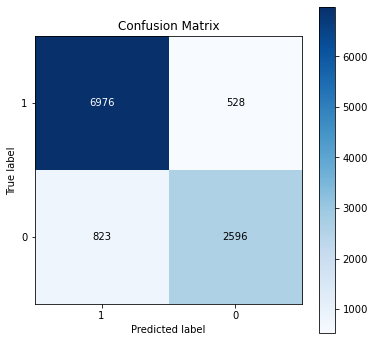

In [207]:
skplt.metrics.plot_confusion_matrix(y_test, predictions_test, labels=[1, 0], figsize=(6,6))
plt.show()

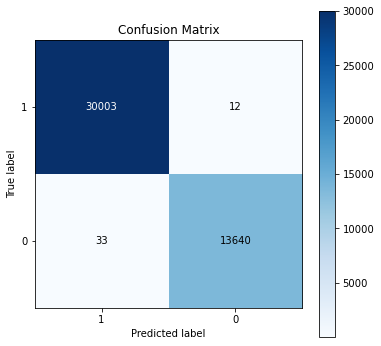

In [264]:
skplt.metrics.plot_confusion_matrix(y_train, predictions_train, labels=[1, 0], figsize=(6,6))
plt.show()

In [265]:
confusion_matrix(y_train, predictions_train)

array([[13640,    33],
       [   12, 30003]])

In [209]:
print(classification_report(y_train, predictions_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13673
           1       1.00      1.00      1.00     30015

    accuracy                           1.00     43688
   macro avg       1.00      1.00      1.00     43688
weighted avg       1.00      1.00      1.00     43688



In [261]:
import pprint

In [263]:
print(classification_report(y_test, predictions_test))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79      3419
           1       0.89      0.93      0.91      7504

    accuracy                           0.88     10923
   macro avg       0.86      0.84      0.85     10923
weighted avg       0.87      0.88      0.87     10923



In [48]:
pl3 = Pipeline([
        ('vectorizer', CountVectorizer(ngram_range=(1, 2))),
        ('clf', AdaBoostClassifier(
                           n_estimators=100,
                           random_state=1))])

In [50]:
pl3.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(ngram_range=(1, 2))),
                ('clf', AdaBoostClassifier(n_estimators=100, random_state=1))])

In [51]:
pl3.score(X_test, y_test)

0.7800054929964295

In [31]:
cv_scores3 = cross_val_score(pl3, X_train, y_train, cv=5).mean()
cv_scores3

0.7790469929584163

In [34]:
pl4 = Pipeline([
        ('vectorizer', CountVectorizer(ngram_range=(1, 2))),
        ('clf', GradientBoostingClassifier(
                           n_estimators=100,
                           random_state=1))])

In [35]:
pl4.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(ngram_range=(1, 2))),
                ('clf', GradientBoostingClassifier(random_state=1))])

In [36]:
pl4.score(X_test, y_test)

0.7475968140620709

In [37]:
cv_scores4 = cross_val_score(pl4, X_train, y_train, cv=5).mean()
cv_scores4

0.7528154008782313

In [38]:
pl5 = Pipeline([
        ('vectorizer', CountVectorizer(ngram_range=(1, 2))),
        ('clf', AdaBoostClassifier(base_estimator=LogisticRegression(solver='liblinear'),
                           n_estimators=100,
                           random_state=1))])

In [39]:
pl5.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(ngram_range=(1, 2))),
                ('clf',
                 AdaBoostClassifier(base_estimator=LogisticRegression(solver='liblinear'),
                                    n_estimators=100, random_state=1))])

In [40]:
pl5.score(X_test, y_test)

0.8149775702645793

In [41]:
cv_scores5 = cross_val_score(pl5, X_train, y_train, cv=5).mean()
cv_scores5

0.8119163224370523

In [108]:
test_scores2 = []
cv_scores2 = []

In [109]:
test_scores2.append(0.8631328389636547)

In [110]:
test_scores2.append(pl1.score(X_test, y_test))

In [111]:
test_scores2.append(pl2.score(X_test, y_test))

In [112]:
test_scores2.append(pl3.score(X_test, y_test))

In [113]:
test_scores2.append(pl4.score(X_test, y_test))

In [114]:
test_scores2.append(pl5.score(X_test, y_test))

In [115]:
test_scores2.append(0.6869907534560102)

In [116]:
test_scores2.append(0.6980682962556074)

In [117]:
test_scores2.append(0.8026183282980867)

In [118]:
test_scores2.append(0.8208367664561018)

In [119]:
test_scores2

[0.8631328389636547,
 0.8540693948548933,
 0.8763160303945803,
 0.7800054929964295,
 0.7475968140620709,
 0.8149775702645793,
 0.6869907534560102,
 0.6980682962556074,
 0.8026183282980867,
 0.8208367664561018]

In [123]:
cv_scores2.append(0.8508973041017838)

In [124]:
cv_scores2.append(0.8462049086144479)

In [125]:
cv_scores2.append(0.8668742021137877)

In [126]:
cv_scores2.append(0.7790469929584163)

In [127]:
cv_scores2.append(0.7528154008782313)

In [128]:
cv_scores2.append(0.8119163224370523)

In [129]:
cv_scores2.append(0.6870307657562084)

In [130]:
cv_scores2.append(0.6966213937232922)

In [131]:
cv_scores2.append(0.7993729139297641)

In [132]:
cv_scores2.append(0.8203854227736265)

In [216]:
cv_scores2

0.8668742021137877

In [136]:
test_scores2

[0.8631328389636547,
 0.8540693948548933,
 0.8763160303945803,
 0.7800054929964295,
 0.7475968140620709,
 0.8149775702645793,
 0.6869907534560102,
 0.6980682962556074,
 0.8026183282980867,
 0.8208367664561018]

In [142]:
labels = ['LogisticRegression', 'LogisticRegression \nLasso' , 'LogisticRegression \nRidge',
          'AdaBoostClassifier', 'GradiestBoostingClassifier', 'AdaBoostClassifier \nwith Logistic Rgression \nRidge',
         'RandomForestClassifier', 'DecisionTreeClassifier', 'AdaBoostClassifier \nwith DecisionTreeClassifier',
         'AdaBoostClassifier \nwith RandomForestClassifier']

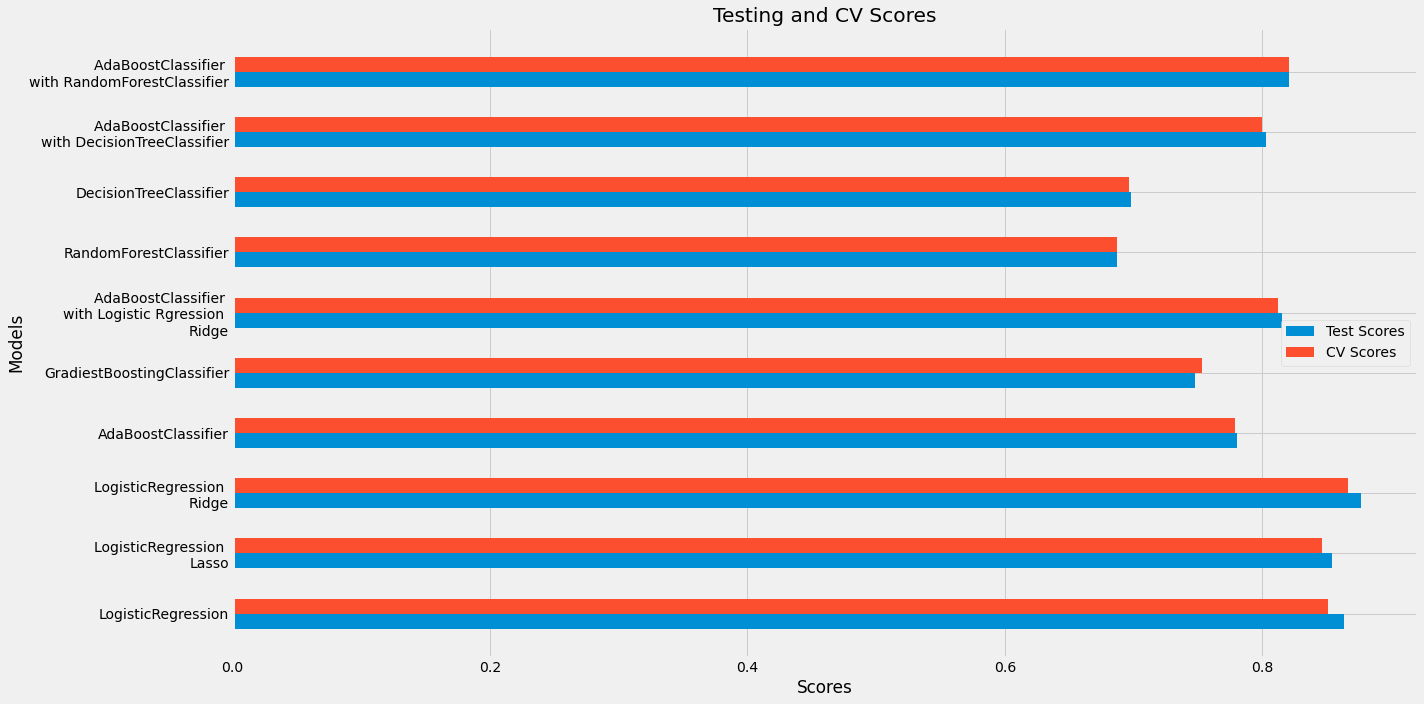

In [143]:
plt.style.use('fivethirtyeight')
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.barh(x - width/2, test_scores2, width, label='Test Scores')
rects2 = ax.barh(x + width/2, cv_scores2, width, label='CV Scores')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Models')
ax.set_xlabel('Scores')
ax.set_title('Testing and CV Scores')
ax.set_yticks(x)
ax.set_yticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()

In [217]:
df.head()

,Rating,Helpful,Review,Drug,Condition,Month,Year,Review_length,review_clean,Rating_Binary
0,8.0,9,accutane (isotretinoin):“i would give this med...,isotretinoin,Acne,December,2019,390,accutane isotretinoin would give medicine 10/1...,1
1,8.0,18,accutane (isotretinoin):“i started getting acn...,isotretinoin,Acne,December,2019,951,accutane isotretinoin started getting acne 13 ...,1
2,10.0,2,“its amazing for big pimples\r\nits clear my f...,isotretinoin,Acne,December,2019,48,amazing big pimples clear face,1
3,9.0,16,accutane (isotretinoin):“previously i had a se...,isotretinoin,Acne,December,2019,995,accutane isotretinoin previously serious acne ...,1
4,7.0,19,accutane (isotretinoin):“my back and abdomen a...,isotretinoin,Acne,December,2019,1008,accutane isotretinoin back abdomen acne became...,1


In [218]:
common_drug_side_effects = pd.DataFrame(columns=['diarrhea', 'constipation', 'dizziness', 'drowsiness', 'fatigue', 'palpitations', 'nausea',
                           'vomitting', 'rash', 'upset stomach', 'hives', 'headache', 'weight gain', 'weight loss', 'dry', 
                           'suicidal', 'fever', 'swelling', 'alopecia', 'heartburn', 'burning', 'dryness', 'vomitting', 
                           'pain', 'anxiety', 'suicide', 'mood swings'])

In [ ]:





['diarrhea', 'constipation', 'dizziness', 'drowsiness', 'fatigue',
'palpitations', 'nausea', 'vomitting', 'rash', 'upset stomach', 'hives',
'headache', 'weight gain', 'weight loss', 'dry','suicidal', 'fever',
'swelling', 'alopecia', 'heartburn', 'burning', 'dryness', 'vomitting', 
'pain', 'anxiety', 'suicide', 'mood swings']









In [219]:
df_side_effects = pd.concat([df,common_drug_side_effects],axis=1)
df_side_effects

,Rating,Helpful,Review,Drug,Condition,Month,Year,Review_length,review_clean,Rating_Binary,...,swelling,alopecia,heartburn,burning,dryness,vomitting,pain,anxiety,suicide,mood swings
0,8.0,9,accutane (isotretinoin):“i would give this med...,isotretinoin,Acne,December,2019,390,accutane isotretinoin would give medicine 10/1...,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8.0,18,accutane (isotretinoin):“i started getting acn...,isotretinoin,Acne,December,2019,951,accutane isotretinoin started getting acne 13 ...,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10.0,2,“its amazing for big pimples\r\nits clear my f...,isotretinoin,Acne,December,2019,48,amazing big pimples clear face,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9.0,16,accutane (isotretinoin):“previously i had a se...,isotretinoin,Acne,December,2019,995,accutane isotretinoin previously serious acne ...,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7.0,19,accutane (isotretinoin):“my back and abdomen a...,isotretinoin,Acne,December,2019,1008,accutane isotretinoin back abdomen acne became...,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54607,10.0,190,“i found xenical to work very well. true it di...,xenical,Obesity,September,2008,621,found xenical work well true side effects good...,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54608,10.0,128,"“i went to my doctor in april of 2000, my weig...",xenical,Obesity,May,2008,453,went doctor april 2000 weight 218 lbs 5 ft 1 i...,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54609,10.0,153,“xenical is great!! on 3 months i lost 30 poun...,xenical,Obesity,February,2008,176,xenical great 3 months lost 30 pounds never ga...,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54610,10.0,111,“xenical made look skinnier than ever. i also ...,xenical,Obesity,February,2008,289,xenical made look skinnier ever also controlle...,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [220]:
for side_effect in common_drug_side_effects:
    df_side_effects[side_effect] = df_side_effects['Review'].map(lambda x: 1 if side_effect in x else 0)

In [221]:
df_side_effects

,Rating,Helpful,Review,Drug,Condition,Month,Year,Review_length,review_clean,Rating_Binary,...,swelling,alopecia,heartburn,burning,dryness,vomitting,pain,anxiety,suicide,mood swings
0,8.0,9,accutane (isotretinoin):“i would give this med...,isotretinoin,Acne,December,2019,390,accutane isotretinoin would give medicine 10/1...,1,...,0,0,0,0,0,0,1,0,0,0
1,8.0,18,accutane (isotretinoin):“i started getting acn...,isotretinoin,Acne,December,2019,951,accutane isotretinoin started getting acne 13 ...,1,...,0,0,0,0,0,0,1,0,0,0
2,10.0,2,“its amazing for big pimples\r\nits clear my f...,isotretinoin,Acne,December,2019,48,amazing big pimples clear face,1,...,0,0,0,0,0,0,0,0,0,0
3,9.0,16,accutane (isotretinoin):“previously i had a se...,isotretinoin,Acne,December,2019,995,accutane isotretinoin previously serious acne ...,1,...,0,0,0,0,0,0,0,0,0,0
4,7.0,19,accutane (isotretinoin):“my back and abdomen a...,isotretinoin,Acne,December,2019,1008,accutane isotretinoin back abdomen acne became...,1,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54607,10.0,190,“i found xenical to work very well. true it di...,xenical,Obesity,September,2008,621,found xenical work well true side effects good...,1,...,0,0,0,0,0,0,0,0,0,0
54608,10.0,128,"“i went to my doctor in april of 2000, my weig...",xenical,Obesity,May,2008,453,went doctor april 2000 weight 218 lbs 5 ft 1 i...,1,...,0,0,0,0,0,0,0,0,0,0
54609,10.0,153,“xenical is great!! on 3 months i lost 30 poun...,xenical,Obesity,February,2008,176,xenical great 3 months lost 30 pounds never ga...,1,...,0,0,0,0,0,0,0,0,0,0
54610,10.0,111,“xenical made look skinnier than ever. i also ...,xenical,Obesity,February,2008,289,xenical made look skinnier ever also controlle...,1,...,0,0,0,0,0,0,0,0,0,0


In [131]:
df_side_effects

,Rating,Helpful,Review,Drug,Condition,Month,Year,Review_length,review_clean,Rating_Binary,...,swelling,alopecia,heartburn,burning,dryness,vomitting,pain,anxiety,suicide,mood swings
0,8.0,9,accutane (isotretinoin):“i would give this med...,isotretinoin,Acne,December,2019,390,accutane isotretinoin would give medicine 10/1...,1,...,0,0,0,0,0,0,1,0,0,0
1,8.0,18,accutane (isotretinoin):“i started getting acn...,isotretinoin,Acne,December,2019,951,accutane isotretinoin started getting acne 13 ...,1,...,0,0,0,0,0,0,1,0,0,0
2,10.0,2,“its amazing for big pimples\r\nits clear my f...,isotretinoin,Acne,December,2019,48,amazing big pimples clear face,1,...,0,0,0,0,0,0,0,0,0,0
3,9.0,16,accutane (isotretinoin):“previously i had a se...,isotretinoin,Acne,December,2019,995,accutane isotretinoin previously serious acne ...,1,...,0,0,0,0,0,0,0,0,0,0
4,7.0,19,accutane (isotretinoin):“my back and abdomen a...,isotretinoin,Acne,December,2019,1008,accutane isotretinoin back abdomen acne became...,1,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54607,10.0,190,“i found xenical to work very well. true it di...,xenical,Obesity,September,2008,621,found xenical work well true side effects good...,1,...,0,0,0,0,0,0,0,0,0,0
54608,10.0,128,"“i went to my doctor in april of 2000, my weig...",xenical,Obesity,May,2008,453,went doctor april 2000 weight 218 lbs 5 ft 1 i...,1,...,0,0,0,0,0,0,0,0,0,0
54609,10.0,153,“xenical is great!! on 3 months i lost 30 poun...,xenical,Obesity,February,2008,176,xenical great 3 months lost 30 pounds never ga...,1,...,0,0,0,0,0,0,0,0,0,0
54610,10.0,111,“xenical made look skinnier than ever. i also ...,xenical,Obesity,February,2008,289,xenical made look skinnier ever also controlle...,1,...,0,0,0,0,0,0,0,0,0,0


In [222]:
df_side_effects.drop_duplicates(inplace=True)

In [223]:
df_side_effects

,Rating,Helpful,Review,Drug,Condition,Month,Year,Review_length,review_clean,Rating_Binary,...,swelling,alopecia,heartburn,burning,dryness,vomitting,pain,anxiety,suicide,mood swings
0,8.0,9,accutane (isotretinoin):“i would give this med...,isotretinoin,Acne,December,2019,390,accutane isotretinoin would give medicine 10/1...,1,...,0,0,0,0,0,0,1,0,0,0
1,8.0,18,accutane (isotretinoin):“i started getting acn...,isotretinoin,Acne,December,2019,951,accutane isotretinoin started getting acne 13 ...,1,...,0,0,0,0,0,0,1,0,0,0
2,10.0,2,“its amazing for big pimples\r\nits clear my f...,isotretinoin,Acne,December,2019,48,amazing big pimples clear face,1,...,0,0,0,0,0,0,0,0,0,0
3,9.0,16,accutane (isotretinoin):“previously i had a se...,isotretinoin,Acne,December,2019,995,accutane isotretinoin previously serious acne ...,1,...,0,0,0,0,0,0,0,0,0,0
4,7.0,19,accutane (isotretinoin):“my back and abdomen a...,isotretinoin,Acne,December,2019,1008,accutane isotretinoin back abdomen acne became...,1,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54607,10.0,190,“i found xenical to work very well. true it di...,xenical,Obesity,September,2008,621,found xenical work well true side effects good...,1,...,0,0,0,0,0,0,0,0,0,0
54608,10.0,128,"“i went to my doctor in april of 2000, my weig...",xenical,Obesity,May,2008,453,went doctor april 2000 weight 218 lbs 5 ft 1 i...,1,...,0,0,0,0,0,0,0,0,0,0
54609,10.0,153,“xenical is great!! on 3 months i lost 30 poun...,xenical,Obesity,February,2008,176,xenical great 3 months lost 30 pounds never ga...,1,...,0,0,0,0,0,0,0,0,0,0
54610,10.0,111,“xenical made look skinnier than ever. i also ...,xenical,Obesity,February,2008,289,xenical made look skinnier ever also controlle...,1,...,0,0,0,0,0,0,0,0,0,0


In [134]:
df_side_effects.dropna(inplace=True)

In [140]:
df_side_effects

,Rating,Helpful,Review,Drug,Condition,Month,Year,Review_length,review_clean,Rating_Binary,...,swelling,alopecia,heartburn,burning,dryness,vomitting,pain,anxiety,suicide,mood swings
0,8.0,9,accutane (isotretinoin):“i would give this med...,isotretinoin,Acne,December,2019,390,accutane isotretinoin would give medicine 10/1...,1,...,0,0,0,0,0,0,1,0,0,0
1,8.0,18,accutane (isotretinoin):“i started getting acn...,isotretinoin,Acne,December,2019,951,accutane isotretinoin started getting acne 13 ...,1,...,0,0,0,0,0,0,1,0,0,0
2,10.0,2,“its amazing for big pimples\r\nits clear my f...,isotretinoin,Acne,December,2019,48,amazing big pimples clear face,1,...,0,0,0,0,0,0,0,0,0,0
3,9.0,16,accutane (isotretinoin):“previously i had a se...,isotretinoin,Acne,December,2019,995,accutane isotretinoin previously serious acne ...,1,...,0,0,0,0,0,0,0,0,0,0
4,7.0,19,accutane (isotretinoin):“my back and abdomen a...,isotretinoin,Acne,December,2019,1008,accutane isotretinoin back abdomen acne became...,1,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54607,10.0,190,“i found xenical to work very well. true it di...,xenical,Obesity,September,2008,621,found xenical work well true side effects good...,1,...,0,0,0,0,0,0,0,0,0,0
54608,10.0,128,"“i went to my doctor in april of 2000, my weig...",xenical,Obesity,May,2008,453,went doctor april 2000 weight 218 lbs 5 ft 1 i...,1,...,0,0,0,0,0,0,0,0,0,0
54609,10.0,153,“xenical is great!! on 3 months i lost 30 poun...,xenical,Obesity,February,2008,176,xenical great 3 months lost 30 pounds never ga...,1,...,0,0,0,0,0,0,0,0,0,0
54610,10.0,111,“xenical made look skinnier than ever. i also ...,xenical,Obesity,February,2008,289,xenical made look skinnier ever also controlle...,1,...,0,0,0,0,0,0,0,0,0,0


In [167]:
dum_se = pd.get_dummies(df_side_effects, columns=['Drug', 'Condition', 'Month'], drop_first=True)

In [232]:
df_side_effects.drop(['review_clean'], axis=1, inplace=True)

In [233]:
df_side_effects

,Rating_Binary,diarrhea,constipation,dizziness,drowsiness,fatigue,palpitations,nausea,vomitting,rash,...,swelling,alopecia,heartburn,burning,dryness,vomitting,pain,anxiety,suicide,mood swings
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54607,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54608,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54609,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54610,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [258]:
df_side_effects.sum()

diarrhea         1674
constipation     1605
dizziness        1164
drowsiness        510
fatigue          1061
palpitations      298
nausea           3885
vomitting          14
rash              910
upset stomach     208
hives             190
headache         3621
weight gain      1363
weight loss      1112
dry              3625
suicidal          984
fever             274
swelling          321
alopecia            7
heartburn         184
burning           708
dryness           298
vomitting          14
pain             8909
anxiety          9069
suicide           301
mood swings       803
dtype: int64

In [234]:
X = df_side_effects
y = df_side_effects.pop('Rating_Binary')

In [245]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=3, stratify=y)

model = LogisticRegression(penalty='none', max_iter=1000)
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
model.fit(X_train, y_train)
print("Training Score:", model.score(X_train, y_train))
print("Test Score:", model.score(X_test, y_test))

Cross-validated training scores: [0.69523919 0.69157702 0.69054704 0.69096944 0.69566213]
Mean cross-validated training score: 0.6927989615831288
Training Score: 0.693416956601355
Test Score: 0.6925752998260551


In [246]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=3, stratify=y)


model = LogisticRegression(solver='liblinear', penalty ='l1', max_iter=1000)
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
model.fit(X_train, y_train)
print("Training Score:", model.score(X_train, y_train))
print("Test Score:", model.score(X_test, y_test))

Cross-validated training scores: [0.69443809 0.69134813 0.69077592 0.69085498 0.69589104]
Mean cross-validated training score: 0.692661633005783
Training Score: 0.6936687419886468
Test Score: 0.6923921999450701


In [253]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=3, stratify=y)

model = LogisticRegression(max_iter=1000)
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
model.fit(X_train, y_train)
print("Training Score:", model.score(X_train, y_train))
print("Test Score:", model.score(X_test, y_test))

Cross-validated training scores: [0.69455253 0.69169146 0.69054704 0.69062607 0.69600549]
Mean cross-validated training score: 0.6926845189189036
Training Score: 0.6936000732466581
Test Score: 0.6924837498855626


In [240]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [251]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=3, stratify=y)

model = RandomForestClassifier()
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
model.fit(X_train, y_train)
print("Training Score:", model.score(X_train, y_train))
print("Test Score:", model.score(X_test, y_test))

Cross-validated training scores: [0.69558251 0.69249256 0.69043259 0.69405975 0.69543322]
Mean cross-validated training score: 0.6936001257258175
Training Score: 0.7044726240615272
Test Score: 0.6905612011352192


In [249]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=3, stratify=y)


model = DecisionTreeClassifier()
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
model.fit(X_train, y_train)
print("Training Score:", model.score(X_train, y_train))
print("Test Score:", model.score(X_test, y_test))

Cross-validated training scores: [0.69512474 0.69146258 0.68974594 0.69280073 0.6952043 ]
Mean cross-validated training score: 0.6928676586183578
Training Score: 0.7044726240615272
Test Score: 0.6895541517898013


In [266]:
test_scores3 = [0.6925752998260551, 0.6923921999450701, 0.6924837498855626, 0.6905612011352192, 0.6895541517898013]

In [267]:
cv_scores3 = [0.6927989615831288, 0.692661633005783, 0.6926845189189036, 0.6936001257258175, 0.6928676586183578]

In [268]:
labels = ['LogisticRegression', 'LogisticRegression \nLasso' , 'LogisticRegression \nRidge',
         'RandomForestClassifier', 'DecisionTreeClassifier']

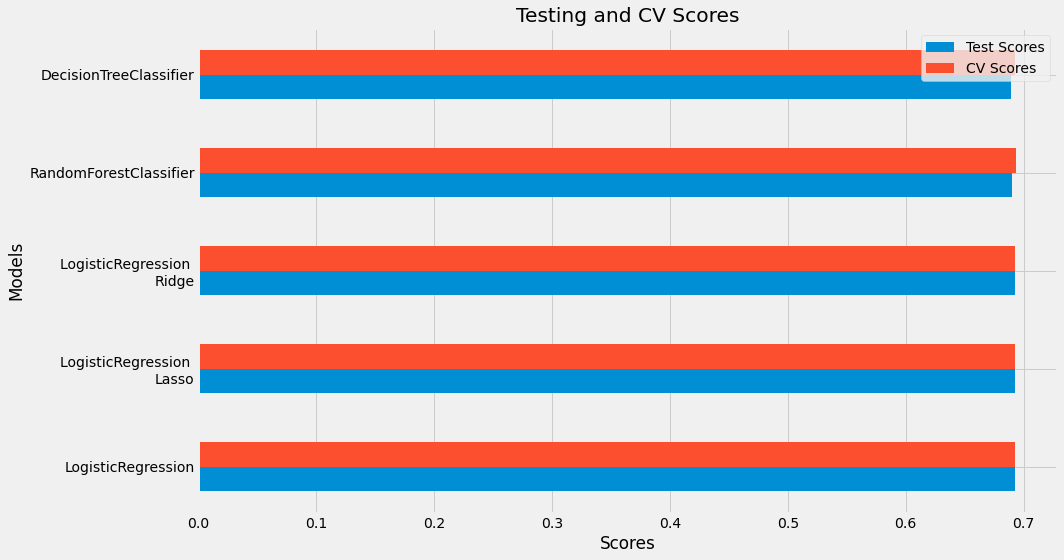

In [279]:
plt.style.use('fivethirtyeight')
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(15,8))
rects1 = ax.barh(x - width/2, test_scores3, width, label='Test Scores')
rects2 = ax.barh(x + width/2, cv_scores3, width, label='CV Scores')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Models')
ax.set_xlabel('Scores')
ax.set_title('Testing and CV Scores')
ax.set_yticks(x)
ax.set_yticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()

In [254]:
coefficient_df = pd.DataFrame()
coefficient_df['Features'] = X_train.columns
coefficient_df['LR_Coefficients'] = model.coef_[0]
coefficient_df['absolutes'] = abs(model.coef_[0])
coefficient_df.sort_values(by='absolutes',ascending=False).head(10)
sorted_coeffcients = coefficient_df.sort_values(by='absolutes',ascending=False)
sorted_coeffcients

,Features,LR_Coefficients,absolutes
10,hives,-1.310513,1.310513
5,palpitations,-0.802214,0.802214
17,swelling,-0.786997,0.786997
0,diarrhea,-0.724064,0.724064
16,fever,-0.610019,0.610019
13,weight loss,0.571472,0.571472
18,alopecia,-0.567152,0.567152
21,dryness,0.518283,0.518283
19,heartburn,-0.486361,0.486361
4,fatigue,-0.465969,0.465969


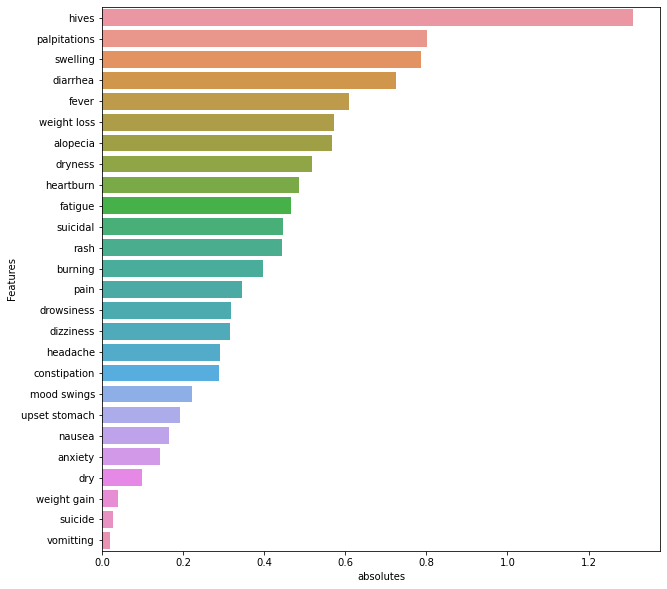

In [255]:
fig,ax= plt.subplots(figsize=(10,10))
sns.barplot(y=sorted_coeffcients.Features,x=sorted_coeffcients.absolutes, orient='h',ax=ax);

In [168]:
X = dum_se
y = dum_se.pop('Rating_Binary')

In [169]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=3, stratify=y)

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

model = LogisticRegression(penalty='none', max_iter=1000)
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
model.fit(X_train, y_train)
print("Training Score:", model.score(X_train, y_train))
print("Test Score:", model.score(X_test, y_test))

Cross-validated training scores: [0.73746853 0.73300526 0.7371252  0.73274579 0.7368662 ]
Mean cross-validated training score: 0.7354421975737002
Training Score: 0.7411646218641275
Test Score: 0.7340230726973082


In [174]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=3, stratify=y)

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

model = LogisticRegression(solver='liblinear', penalty ='l1', max_iter=1000)
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
model.fit(X_train, y_train)
print("Training Score:", model.score(X_train, y_train))
print("Test Score:", model.score(X_test, y_test))

Cross-validated training scores: [0.73723964 0.73369192 0.73758297 0.73343253 0.73652283]
Mean cross-validated training score: 0.7356939792941691
Training Score: 0.7411417322834646
Test Score: 0.7341146310199597


In [173]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=3, stratify=y)

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

model = LogisticRegression(max_iter=1000)
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
model.fit(X_train, y_train)
print("Training Score:", model.score(X_train, y_train))
print("Test Score:", model.score(X_test, y_test))

Cross-validated training scores: [0.73746853 0.73300526 0.73701076 0.73286025 0.73698066]
Mean cross-validated training score: 0.7354650913459944
Training Score: 0.7411875114447903
Test Score: 0.7341146310199597


In [175]:
coefficient_df = pd.DataFrame()
coefficient_df['Features'] = X_train.columns
coefficient_df['LR_Coefficients'] = model.coef_[0]
coefficient_df['absolutes'] = abs(model.coef_[0])
coefficient_df.sort_values(by='absolutes',ascending=False).head(10)

,Features,LR_Coefficients,absolutes
0,Helpful,0.848134,0.848134
1,Year,-0.402090,0.402090
2,Review_length,0.224450,0.224450
135,Drug_fleet enema,0.209230,0.209230
26,pain,-0.203132,0.203132
44,Drug_alprazolam,0.197235,0.197235
217,Drug_oxycodone,0.188610,0.188610
34,Drug_acetaminophen/oxycodone,0.180792,0.180792
167,Drug_lamotrigine,0.175412,0.175412
302,Condition_Hypertension,-0.166924,0.166924


In [62]:
word_table = pd.read_csv('../../resource-datasets/HIV/inquirerbasic.csv')

In [63]:
word_table.head()

,Entry,Source,Positiv,Negativ
0,A,H4Lvd,NaN,NaN
1,ABANDON,H4Lvd,NaN,Negativ
2,ABANDONMENT,H4,NaN,Negativ
3,ABATE,H4Lvd,NaN,Negativ
4,ABATEMENT,Lvd,NaN,NaN


In [64]:
import regex as re

In [65]:
temp_Positiv = []
Positiv_word_list = []
for i in range(0,len(word_table.Positiv)):
    if word_table.iloc[i,2] == "Positiv":
        temp = word_table.iloc[i,0].lower()
        temp1 = re.sub('\d+', '', temp)
        temp2 = re.sub('#', '', temp1) 
        temp_Positiv.append(temp2)

Positiv_word_list = list(set(temp_Positiv))
len(temp_Positiv)
len(Positiv_word_list)

1637

In [66]:
temp_Negativ = []
Negativ_word_list = []
for i in range(0,len(word_table.Negativ)):
    if word_table.iloc[i,3] == "Negativ":
        temp = word_table.iloc[i,0].lower()
        temp1 = re.sub('\d+', '', temp)
        temp2 = re.sub('#', '', temp1) 
        temp_Negativ.append(temp2)

Negativ_word_list = list(set(temp_Negativ))
len(temp_Negativ)
len(Negativ_word_list)  #del temp_Negativ

2006

In [67]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(vocabulary = Positiv_word_list)
content = df['review_clean']
X = vectorizer.fit_transform(content)
f = X.toarray()
f = pd.DataFrame(f)
f.columns=Positiv_word_list
df["num_Positiv_word"] = f.sum(axis=1)

vectorizer2 = CountVectorizer(vocabulary = Negativ_word_list)
content = df['review_clean']
X2 = vectorizer2.fit_transform(content)
f2 = X2.toarray()
f2 = pd.DataFrame(f2)
f2.columns=Negativ_word_list
df["num_Negativ_word"] = f2.sum(axis=1)

In [68]:
df

,Rating,Helpful,Review,Drug,Condition,Month,Year,Review_length,review_clean,Rating_Binary,num_Positiv_word,num_Negativ_word,Positiv_ratio,sentiment_by_dic
0,8.0,9,accutane (isotretinoin):“i would give this med...,isotretinoin,Acne,December,2019,390,accutane isotretinoin would give medicine 10/1...,1,2.0,0.0,1.000000,1.0
1,8.0,18,accutane (isotretinoin):“i started getting acn...,isotretinoin,Acne,December,2019,951,accutane isotretinoin started getting acne 13 ...,1,6.0,9.0,0.400000,0.0
2,10.0,2,“its amazing for big pimples\r\nits clear my f...,isotretinoin,Acne,December,2019,48,amazing big pimples clear face,1,2.0,0.0,1.000000,1.0
3,9.0,16,accutane (isotretinoin):“previously i had a se...,isotretinoin,Acne,December,2019,995,accutane isotretinoin previously serious acne ...,1,7.0,4.0,0.636364,1.0
4,7.0,19,accutane (isotretinoin):“my back and abdomen a...,isotretinoin,Acne,December,2019,1008,accutane isotretinoin back abdomen acne became...,1,7.0,10.0,0.411765,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54607,10.0,190,“i found xenical to work very well. true it di...,xenical,Obesity,September,2008,621,found xenical work well true side effects good...,1,2.0,0.0,1.000000,1.0
54608,10.0,128,"“i went to my doctor in april of 2000, my weig...",xenical,Obesity,May,2008,453,went doctor april 2000 weight 218 lbs 5 ft 1 i...,1,4.0,1.0,0.800000,1.0
54609,10.0,153,“xenical is great!! on 3 months i lost 30 poun...,xenical,Obesity,February,2008,176,xenical great 3 months lost 30 pounds never ga...,1,4.0,2.0,0.666667,1.0
54610,10.0,111,“xenical made look skinnier than ever. i also ...,xenical,Obesity,February,2008,289,xenical made look skinnier ever also controlle...,1,1.0,2.0,0.333333,0.0


In [69]:
df["Positiv_ratio"] = df["num_Positiv_word"]/(df["num_Positiv_word"]+df["num_Negativ_word"])
df["sentiment_by_dic"] = df["Positiv_ratio"].apply(lambda x: 1 if (x>=0.5) else (0 if (x<0.5) else 0.5))

In [70]:
def userful_count(data):
    grouped = data.groupby(['Condition']).size().reset_index(name='user_size')
    data = pd.merge(data,grouped,on='Condition',how='left')
    return data
#___________________________________________________________
df_2 =  userful_count(df) 

In [71]:
df_2

,Rating,Helpful,Review,Drug,Condition,Month,Year,Review_length,review_clean,Rating_Binary,num_Positiv_word,num_Negativ_word,Positiv_ratio,sentiment_by_dic,user_size
0,8.0,9,accutane (isotretinoin):“i would give this med...,isotretinoin,Acne,December,2019,390,accutane isotretinoin would give medicine 10/1...,1,2.0,0.0,1.000000,1.0,5611
1,8.0,18,accutane (isotretinoin):“i started getting acn...,isotretinoin,Acne,December,2019,951,accutane isotretinoin started getting acne 13 ...,1,6.0,9.0,0.400000,0.0,5611
2,10.0,2,“its amazing for big pimples\r\nits clear my f...,isotretinoin,Acne,December,2019,48,amazing big pimples clear face,1,2.0,0.0,1.000000,1.0,5611
3,9.0,16,accutane (isotretinoin):“previously i had a se...,isotretinoin,Acne,December,2019,995,accutane isotretinoin previously serious acne ...,1,7.0,4.0,0.636364,1.0,5611
4,7.0,19,accutane (isotretinoin):“my back and abdomen a...,isotretinoin,Acne,December,2019,1008,accutane isotretinoin back abdomen acne became...,1,7.0,10.0,0.411765,0.0,5611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54606,10.0,190,“i found xenical to work very well. true it di...,xenical,Obesity,September,2008,621,found xenical work well true side effects good...,1,2.0,0.0,1.000000,1.0,3464
54607,10.0,128,"“i went to my doctor in april of 2000, my weig...",xenical,Obesity,May,2008,453,went doctor april 2000 weight 218 lbs 5 ft 1 i...,1,4.0,1.0,0.800000,1.0,3464
54608,10.0,153,“xenical is great!! on 3 months i lost 30 poun...,xenical,Obesity,February,2008,176,xenical great 3 months lost 30 pounds never ga...,1,4.0,2.0,0.666667,1.0,3464
54609,10.0,111,“xenical made look skinnier than ever. i also ...,xenical,Obesity,February,2008,289,xenical made look skinnier ever also controlle...,1,1.0,2.0,0.333333,0.0,3464


In [72]:
df_2['usefulCount'] = df_2['Helpful']/df_2['user_size']

In [73]:
sub_preds_deep = pl2.predict(df_2['review_clean'])
sub_preds_deep

array([1, 1, 1, ..., 1, 1, 1])

In [74]:
df_2['deep_pred'] = sub_preds_deep

df_2['total_pred'] = (df_2['deep_pred'] + df_2['sentiment_by_dic'])*df_2['usefulCount']

In [75]:
df_3 = df_2.groupby(['Condition','Drug']).agg({'total_pred' : ['mean']})
df_3.head(20)

total_pred
                                               mean
Condition Drug                                     
ADHD      adderall                         0.015756
          adderall xr                      0.012088
          amphetamine/dextroamphetamine    0.010804
          atomoxetine                      0.010199
          concerta                         0.011887
          dexmethylphenidate               0.010791
          guanfacine                       0.016525
          lisdexamfetamine                 0.010873
          methylphenidate                  0.010400
          strattera                        0.010932
          vyvanse                          0.011112
Acne      adapalene / benzoyl peroxide     0.002796
          benzoyl peroxide/clindamycin     0.003005
          doxycycline                      0.003754
          drospirenone/ethinyl estradiol   0.002934
          epiduo                           0.003209
          ethinyl estradiol/norgestimate   0.004602
          isotretinoin                     0.004939
          minocycline                      0.002793
Allergies acthar                           0.039216

In [76]:
X_test

39983    trazodone 50mg nothing take meds needed someth...
4531     tri-sprintec ethinyl estradiol norgestimate ta...
3515     yasmin drospirenone ethinyl estradiol started ...
41646    taking quetiapine temazep vistail suffer anxie...
50440    currently lamictal 350mg neurologist due cost ...
                               ...                        
213      acne since 13. severely affected life always g...
22469    take every time get pneumonia times year born ...
9647     intuniv guanfacine intuniv work son bouncing w...
54599    metamucil may help side effects started taking...
37447    losartan 12 months first medicine lowered bp 1...
Name: review_clean, Length: 10923, dtype: object

In [78]:
df.head(1)

,Rating,Helpful,Review,Drug,Condition,Month,Year,Review_length,review_clean,Rating_Binary,num_Positiv_word,num_Negativ_word,Positiv_ratio,sentiment_by_dic
0,8.0,9,accutane (isotretinoin):“i would give this med...,isotretinoin,Acne,December,2019,390,accutane isotretinoin would give medicine 10/1...,1,2.0,0.0,1.0,1.0


In [82]:
df_5 = df.loc[:, ['Helpful', 'Drug', 'Condition', 'review_clean', 'Rating_Binary']]

In [84]:
X = df_5
y = df_5.pop('Rating_Binary')

In [85]:
X

,Helpful,Drug,Condition,review_clean
0,9,isotretinoin,Acne,accutane isotretinoin would give medicine 10/1...
1,18,isotretinoin,Acne,accutane isotretinoin started getting acne 13 ...
2,2,isotretinoin,Acne,amazing big pimples clear face
3,16,isotretinoin,Acne,accutane isotretinoin previously serious acne ...
4,19,isotretinoin,Acne,accutane isotretinoin back abdomen acne became...
...,...,...,...,...
54607,190,xenical,Obesity,found xenical work well true side effects good...
54608,128,xenical,Obesity,went doctor april 2000 weight 218 lbs 5 ft 1 i...
54609,153,xenical,Obesity,xenical great 3 months lost 30 pounds never ga...
54610,111,xenical,Obesity,xenical made look skinnier ever also controlle...


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3, stratify=y)

In [87]:
pl2 = Pipeline([
        ('vectorizer', CountVectorizer(ngram_range=(1, 2))),
        ('clf', LogisticRegression(solver = 'liblinear'))])

In [88]:
X_train

,Helpful,Drug,Condition,review_clean
48765,34,dilaudid,Pain,er day slipped disc pinched sciatic nerve give...
33250,5,trulicity,Diabetes (Type 2),blurry vision became clear glucose levels drop...
7487,20,vyvanse,ADHD,third medicine daughter year although two work...
15981,123,gabapentin,Anxiety,even taking gabapentin three years get-go felt...
17884,20,latuda,BiPolar Disorder,horrible drug beware side effects severe tremo...
...,...,...,...,...
54252,39,adipex-p,Obesity,started taking adipex-p 4 weeks ago cons const...
27864,30,venlafaxine,Depression,effexor xr venlafaxine glad drug works recentl...
18969,35,lamictal,BiPolar Disorder,started 25 mg upped 50 100 2 week periods feel...
14787,36,lorazepam,Anxiety,ativan lorazepam terrible anxiety panic disord...


In [90]:
pl2.fit(X_train['review_clean'], y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(ngram_range=(1, 2))),
                ('clf', LogisticRegression(solver='liblinear'))])

In [92]:
pl2.score(X_test['review_clean'], y_test)

0.8763160303945803

In [95]:
vectorizer = CountVectorizer(vocabulary = Positiv_word_list)
content = X_test['review_clean']
X = vectorizer.fit_transform(content)
f = X.toarray()
f = pd.DataFrame(f)
f.columns=Positiv_word_list
X_test["num_Positiv_word"] = f.sum(axis=1)

vectorizer2 = CountVectorizer(vocabulary = Negativ_word_list)
content = X_test['review_clean']
X2 = vectorizer2.fit_transform(content)
f2 = X2.toarray()
f2 = pd.DataFrame(f2)
f2.columns=Negativ_word_list
X_test["num_Negativ_word"] = f2.sum(axis=1)

<ipython-input-95-1cda5708877d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["num_Positiv_word"] = f.sum(axis=1)
<ipython-input-95-1cda5708877d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["num_Negativ_word"] = f2.sum(axis=1)


In [96]:
X_test

,Helpful,Drug,Condition,review_clean,num_Positiv_word,num_Negativ_word
39983,3,trazodone,Insomnia,trazodone 50mg nothing take meds needed someth...,NaN,NaN
4531,8,ethinyl estradiol/norgestimate,Acne,tri-sprintec ethinyl estradiol norgestimate ta...,2.0,4.0
3515,8,drospirenone/ethinyl estradiol,Acne,yasmin drospirenone ethinyl estradiol started ...,3.0,7.0
41646,63,quetiapine,Insomnia,taking quetiapine temazep vistail suffer anxie...,NaN,NaN
50440,16,zonisamide,Seizures,currently lamictal 350mg neurologist due cost ...,NaN,NaN
...,...,...,...,...,...,...
213,3,isotretinoin,Acne,acne since 13. severely affected life always g...,0.0,4.0
22469,22,bronkaid,Cold & Flu,take every time get pneumonia times year born ...,NaN,NaN
9647,23,guanfacine,ADHD,intuniv guanfacine intuniv work son bouncing w...,7.0,4.0
54599,100,xenical,Obesity,metamucil may help side effects started taking...,NaN,NaN


In [97]:
X_test["Positiv_ratio"] = X_test["num_Positiv_word"]/(X_test["num_Positiv_word"]+X_test["num_Negativ_word"])
X_test["sentiment_by_dic"] = X_test["Positiv_ratio"].apply(lambda x: 1 if (x>=0.5) else (0 if (x<0.5) else 0.5))

<ipython-input-97-14187e00444e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Positiv_ratio"] = X_test["num_Positiv_word"]/(X_test["num_Positiv_word"]+X_test["num_Negativ_word"])
<ipython-input-97-14187e00444e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["sentiment_by_dic"] = X_test["Positiv_ratio"].apply(lambda x: 1 if (x>=0.5) else (0 if (x<0.5) else 0.5))


In [98]:
X_test

,Helpful,Drug,Condition,review_clean,num_Positiv_word,num_Negativ_word,Positiv_ratio,sentiment_by_dic
39983,3,trazodone,Insomnia,trazodone 50mg nothing take meds needed someth...,NaN,NaN,NaN,0.5
4531,8,ethinyl estradiol/norgestimate,Acne,tri-sprintec ethinyl estradiol norgestimate ta...,2.0,4.0,0.333333,0.0
3515,8,drospirenone/ethinyl estradiol,Acne,yasmin drospirenone ethinyl estradiol started ...,3.0,7.0,0.300000,0.0
41646,63,quetiapine,Insomnia,taking quetiapine temazep vistail suffer anxie...,NaN,NaN,NaN,0.5
50440,16,zonisamide,Seizures,currently lamictal 350mg neurologist due cost ...,NaN,NaN,NaN,0.5
...,...,...,...,...,...,...,...,...
213,3,isotretinoin,Acne,acne since 13. severely affected life always g...,0.0,4.0,0.000000,0.0
22469,22,bronkaid,Cold & Flu,take every time get pneumonia times year born ...,NaN,NaN,NaN,0.5
9647,23,guanfacine,ADHD,intuniv guanfacine intuniv work son bouncing w...,7.0,4.0,0.636364,1.0
54599,100,xenical,Obesity,metamucil may help side effects started taking...,NaN,NaN,NaN,0.5


In [99]:
def userful_count(data):
    grouped = data.groupby(['Condition']).size().reset_index(name='user_size')
    data = pd.merge(data,grouped,on='Condition',how='left')
    return data
#___________________________________________________________
df_6 =  userful_count(X_test) 

In [100]:
df_6

,Helpful,Drug,Condition,review_clean,num_Positiv_word,num_Negativ_word,Positiv_ratio,sentiment_by_dic,user_size
0,3,trazodone,Insomnia,trazodone 50mg nothing take meds needed someth...,NaN,NaN,NaN,0.5,855
1,8,ethinyl estradiol/norgestimate,Acne,tri-sprintec ethinyl estradiol norgestimate ta...,2.0,4.0,0.333333,0.0,1120
2,8,drospirenone/ethinyl estradiol,Acne,yasmin drospirenone ethinyl estradiol started ...,3.0,7.0,0.300000,0.0,1120
3,63,quetiapine,Insomnia,taking quetiapine temazep vistail suffer anxie...,NaN,NaN,NaN,0.5,855
4,16,zonisamide,Seizures,currently lamictal 350mg neurologist due cost ...,NaN,NaN,NaN,0.5,136
...,...,...,...,...,...,...,...,...,...
10918,3,isotretinoin,Acne,acne since 13. severely affected life always g...,0.0,4.0,0.000000,0.0,1120
10919,22,bronkaid,Cold & Flu,take every time get pneumonia times year born ...,NaN,NaN,NaN,0.5,19
10920,23,guanfacine,ADHD,intuniv guanfacine intuniv work son bouncing w...,7.0,4.0,0.636364,1.0,923
10921,100,xenical,Obesity,metamucil may help side effects started taking...,NaN,NaN,NaN,0.5,678


In [103]:
df_6['usefulCount'] = df_6['Helpful']/df_6['user_size']

In [108]:
sub_preds_deep2 = pl2.predict(df_6['review_clean'])
sub_preds_deep2

array([0, 0, 1, ..., 0, 1, 0])

In [183]:
df_6['deep_pred'] = sub_preds_deep2

df_6['total_pred'] = (df_6['deep_pred'] + df_6['sentiment_by_dic'])*df_6['usefulCount']

In [184]:
df_6.head()

,Helpful,Drug,Condition,review_clean,num_Positiv_word,num_Negativ_word,Positiv_ratio,sentiment_by_dic,user_size,usefulCount,deep_pred,total_pred
0,3,trazodone,Insomnia,trazodone 50mg nothing take meds needed someth...,NaN,NaN,NaN,0.5,855,0.003509,0,0.001754
1,8,ethinyl estradiol/norgestimate,Acne,tri-sprintec ethinyl estradiol norgestimate ta...,2.0,4.0,0.333333,0.0,1120,0.007143,0,0.000000
2,8,drospirenone/ethinyl estradiol,Acne,yasmin drospirenone ethinyl estradiol started ...,3.0,7.0,0.300000,0.0,1120,0.007143,1,0.007143
3,63,quetiapine,Insomnia,taking quetiapine temazep vistail suffer anxie...,NaN,NaN,NaN,0.5,855,0.073684,1,0.110526
4,16,zonisamide,Seizures,currently lamictal 350mg neurologist due cost ...,NaN,NaN,NaN,0.5,136,0.117647,1,0.176471


In [182]:
df_7 = df_6.groupby(['Condition','Drug']).agg({'total_pred' : ['mean']})
df_7.head(30)

total_pred
                                               mean
Condition Drug                                     
ADHD      adderall                         0.107062
          adderall xr                      0.053629
          amphetamine/dextroamphetamine    0.055207
          atomoxetine                      0.085738
          concerta                         0.091697
          dexmethylphenidate               0.043156
          guanfacine                       0.145720
          lisdexamfetamine                 0.050732
          methylphenidate                  0.056827
          strattera                        0.096720
          vyvanse                          0.085165
Acne      adapalene / benzoyl peroxide     0.017942
          benzoyl peroxide/clindamycin     0.025186
          doxycycline                      0.020351
          drospirenone/ethinyl estradiol   0.027589
          epiduo                           0.015295
          ethinyl estradiol/norgestimate   0.033489
          isotretinoin                     0.032112
          minocycline                      0.016780
Allergies hydroxyzine                      0.716981
          levocetirizine                   0.089623
          xyzal                            0.415094
Angina    carvedilol                            NaN
          isosorbide dinitrate                  NaN
          isosorbide mononitrate           0.000000
          lopressor                             NaN
          metoprolol                            NaN
          metoprolol tartrate              1.796875
          nitroglycerin                    1.265625
          nitrolingual pumpspray                NaN

In [211]:
def range_ngrams(listTokens, ngramRange=(1,2)):
    return (n_grams(listTokens, i) for i in range(ngramRange))

In [214]:
listTokens = df['review_clean']

In [215]:
range_ngrams(listTokens, ngramRange=(1,2))

TypeError: 'tuple' object cannot be interpreted as an integer